# 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection
import math

from IPython.display import Image
from datetime import datetime, timedelta

## 0.1 HELPER FUNCTIONS

In [2]:
# Set figure size for plottiing
plt.rcParams['figure.figsize'] = [20, 12]

# Set seaborn plot style
sns.set(style='dark')

## 0.2 LOADING DATA

In [3]:
# Loading initial data
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# Merging DataFrames to get sales and store attributes
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')
df_raw.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0 DATA DESCRIPTION

## 1.1 Rename Columns

In [4]:
# Creating copy to manipulate DataFrame on this section
df1 = df_raw.copy()

# Saving the original column names in a list
cols_original = df1.columns.to_list()

# Defining local function to turn names into snakecase
snakecase = lambda x: inflection.underscore(x)

# Applying function to all names and saving into a new variable
cols_new_name = list(map(snakecase, cols_original))

# Renaming columns
df1.columns = cols_new_name

df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions

In [5]:
print(f'The DataFrame have {df1.shape[0]} rows')

print(f'The DataFrame have {df1.shape[1]} columns')

The DataFrame have 1017209 rows
The DataFrame have 18 columns


## 1.3 Data Types

In [6]:
# Cast date column into date format
df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [7]:
# Check if a field is null and sums columns nulls
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NAs

In [8]:
# competition_distance
max_distance = 200000
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: max_distance if math.isnan(x) else x)

# competition_open_since_month 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)                                                       

# competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1) 

# promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)                                                       

# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)                                                       

# promo_interval
month_map = {1:'Jan', 2:'Feb', 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun' , 7:'Jul' , 8:'Aug' , 9:'Sept' , 10:'Oct' , 11:'Nov' , 12:'Dec'}

# Fill the NA's with 0
df1['promo_interval'].fillna(0, inplace=True)

# Create a column with the month date written
df1['month_map'] = df1['date'].dt.month.map(month_map)

# Flag is there's promo currently active compared with date
df1['is_promo'] = df1[['month_map', 'promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [9]:
# Recheck of NA's
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Checking Data Types

In [10]:
# competition_open_since_month           
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')

# competition_open_since_year
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

# promo2_since_week
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')

# promo2_since_year
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

## 1.7 Descriptive Statistics

In [11]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [12]:
# Central Tendencies - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: np.max(x) - np.min(x))).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

statistical_metrics = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
statistical_metrics.columns = ['attibutes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

statistical_metrics

,attibutes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2 Categorical Attributes

In [13]:
# Check unique values of each category
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

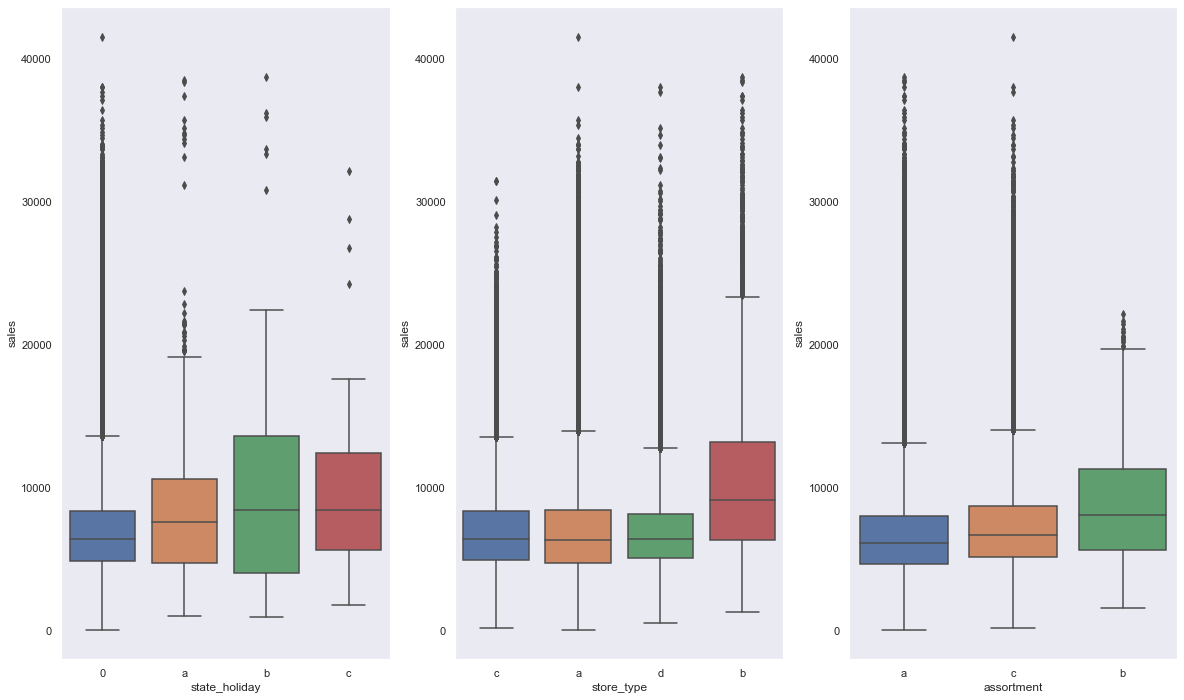

In [14]:
# Boxplot of categorical attributes

plt.figure(figsize=(20,12))

aux1 = df1[((df1['sales'] > 0) & (df1['state_holiday'] != 0 ))]

ax1 = plt.subplot(1, 3, 1)
g1 = sns.boxplot(data=aux1, x='state_holiday', y='sales', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
g2 = sns.boxplot(data=aux1, x='store_type', y='sales', ax=ax2)

ax3 = plt.subplot(1, 3, 3)
g3 = sns.boxplot(data=aux1, x='assortment', y='sales', ax=ax3)

# 2.0 FEATURE ENGINEERING

In [15]:
df2 = df1.copy()

## 2.1 Hypothesis Mindmap

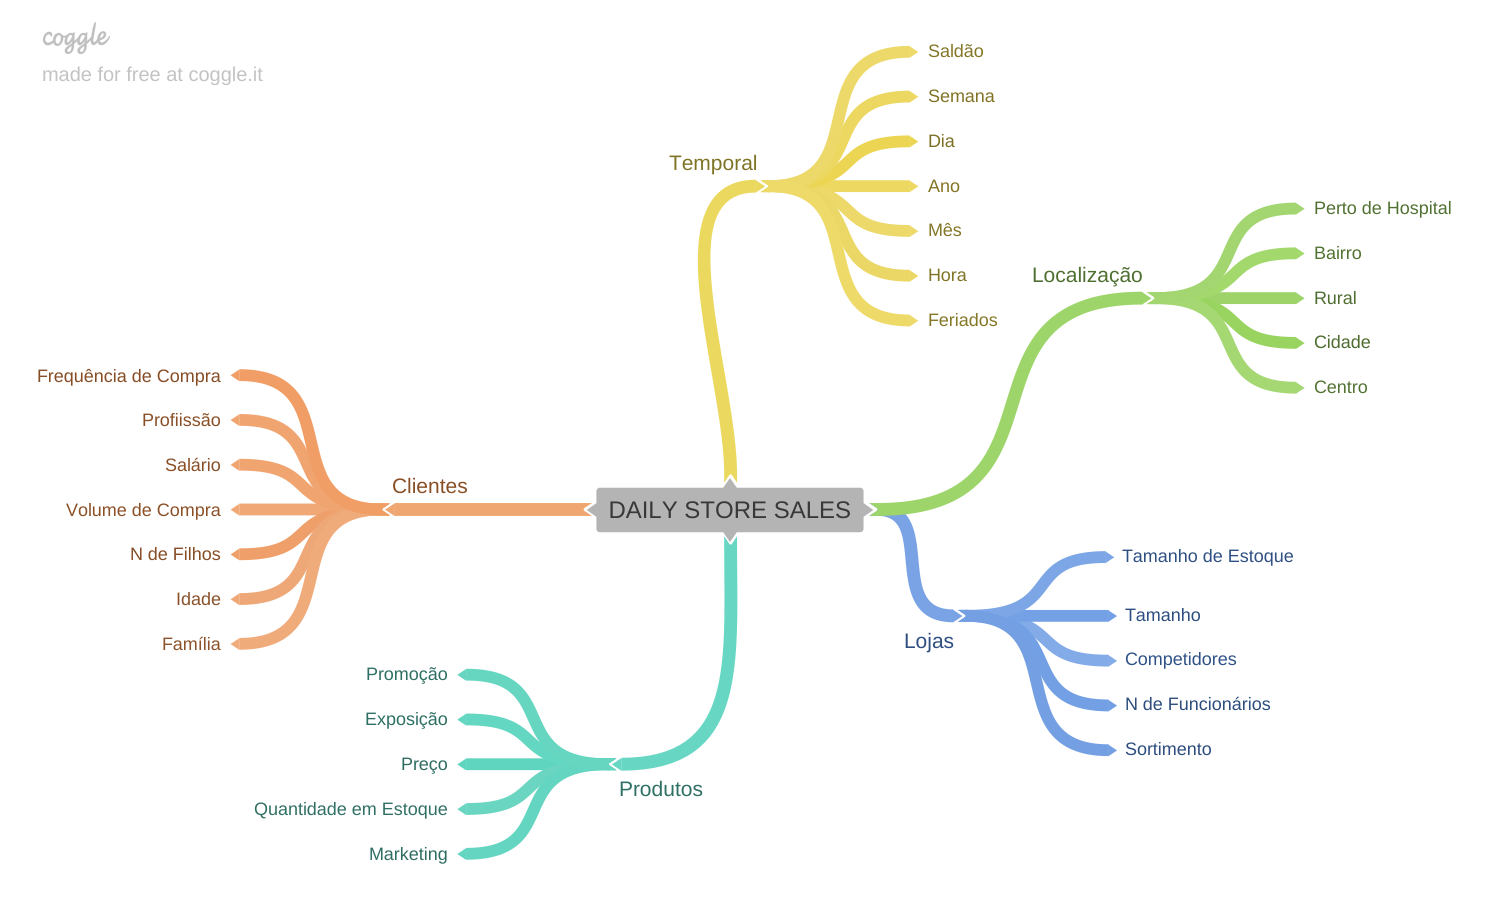

In [16]:
Image('img/mindmap_hypothesis.png')

## 2.2 Creating Hypothesis

### 2.2.1 Store Hypothesis

**1.** Stores with more employees should sell more.  
**2.** Stores with more stock capacity should sell more.  
**3.** Larger stores should sell more.  
**4.** Stores with a larger assortment should sell more.  
**5.** Stores with closer competitors should sell less.  
**6.** Stores with longer-term competitors should sell more.  

### 2.2.2 Product Hypothesis

**1.** Stores that invest more in marketing should sell more.  
**2.** Stores with more product exposure should sell more.  
**3.** Stores with lower priced products should sell more.  
**5.** Stores with more aggressive promotions (larger discounts) should sell more.  
**6.** Stores with longer promotions should sell more.  
**7.** Stores with more promotion days should sell more.  
**8.** Stores with more consecutive promotions should sell more.  

### 2.2.3 Time Hypothesis

**1.** stores open during the Christmas holiday should sell more.  
**2.** Stores should sell more over the years.  
**3.** Stores should sell more in the second half of the year.  
**4.** Stores should sell more after the 10th of each month.  
**5.** Stores should sell less on weekends.  
**6.** Stores should sell less during school holidays.

## 2.3 Hypothesis List (prioritized)

**1.** Stores with a larger assortment should sell more.  
**2.** Stores with closer competitors should sell less.  
**3.** Stores with longer-term competitors should sell more.  
**4.** Stores with longer promotions should sell more.  
**5.** Stores with more promotion days should sell more.  
**6.** Stores with more consecutive promotions should sell more.  
**7.** stores open during the Christmas holiday should sell more.  
**8.** Stores should sell more over the years.  
**9.** Stores should sell more in the second half of the year.  
**10.** Stores should sell more after the 10th of each month.  
**11.** Stores should sell less on weekends.  
**12.** Stores should sell less during school holidays.

## 2.4 Feature Engineering

In [17]:
df2.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo'],
      dtype='object')

In [18]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of the year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# Competition since (Number of months from the date since the store have competition)
df2['competition_since'] = df2.apply(lambda x: datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype('int64') # Granularity in monhts

# Promo since (Number of weeks from date since there is a promo active)
df2['promo_since'] = (df2['promo2_since_year'].astype('str') + '-' + df2['promo2_since_week'].astype('str'))
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.strptime(x +'-1', '%Y-%W-%w') - timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since']) / 7).apply(lambda x: x.days).astype('int64')

# Assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 
                                                      'extra' if x == 'b' else 
                                                      'extended')

# State Holiday
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 
                                                            'easter_holiday' if x == 'b' else 
                                                            'christmas' if x == 'c' else 
                                                            'regular_day')

# 3.0 FEATURE FILTERING

In [19]:
df3 = df2.copy()

### 3.1 Rows

In [20]:
print(f'Rows before filtering: {df3.shape[0]}')

Rows before filtering: 1017209


In [21]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)].reset_index()
print(f'Rows after filtering: {df3.shape[0]}')

Rows after filtering: 844338


### 3.2 Columns

In [22]:
df3.drop(columns=['index', 'customers', 'open', 'promo_interval', 'month_map'], inplace=True)

# 4.0 EXPLORATORY DATA ANALYSIS

In [23]:
df4 = df3.copy()

## 4.1 Univariate

### 4.1.1 Response Variable

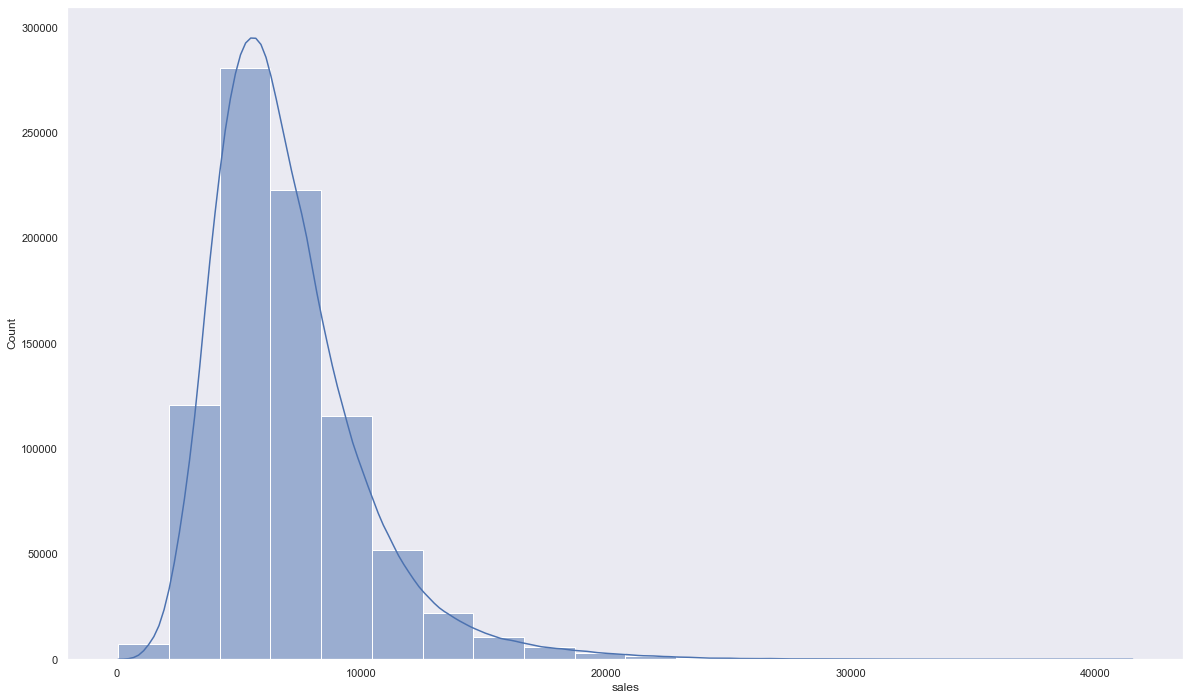

In [24]:
# Set histogram of sales
sns.histplot(data=df4, x='sales', bins=20, kde=True);

### 4.1.2 Numeric Variables

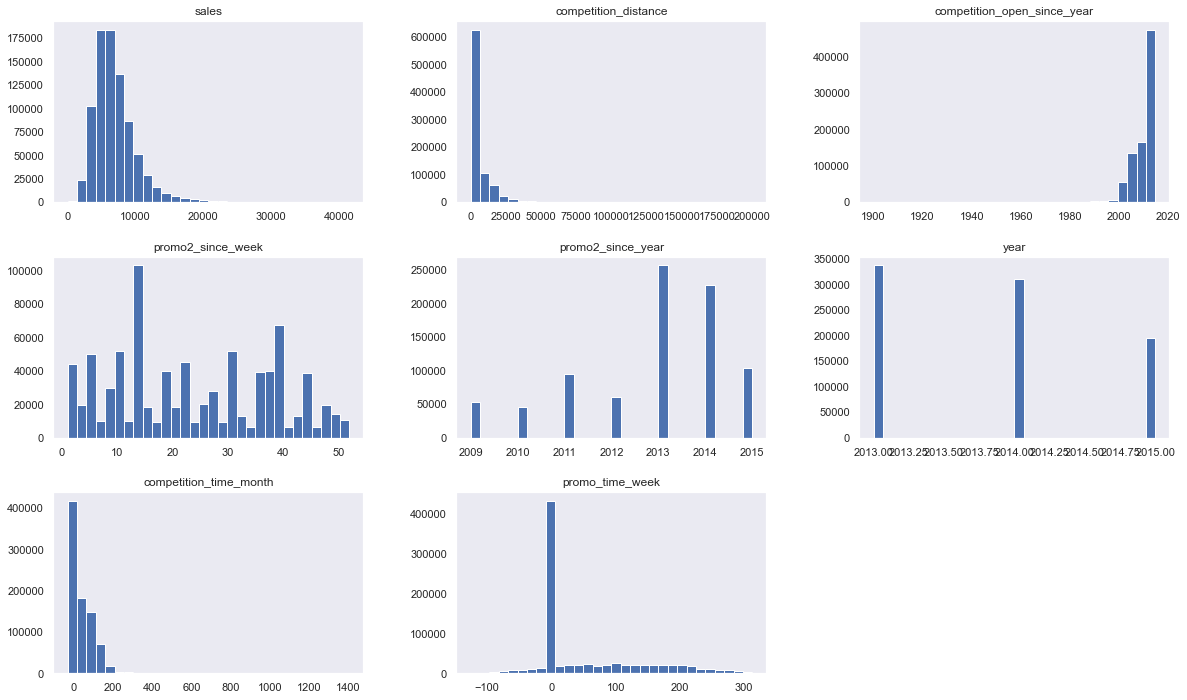

In [25]:
# Filter only numeric features
num_attributes = df4.select_dtypes(include=['int64', 'float64'])

# Excluding some features that does not make sense
cols = ['store', 'day_of_week', 'promo', 'school_holiday', 'promo2', 'is_promo', 'competition_open_since_month', 'month', 'day']
num_attributes.drop(columns=cols, inplace=True)

# Create histograms for all numeric variables
num_attributes.hist(bins=30, grid=False);

### 4.1.3 categorical Variable

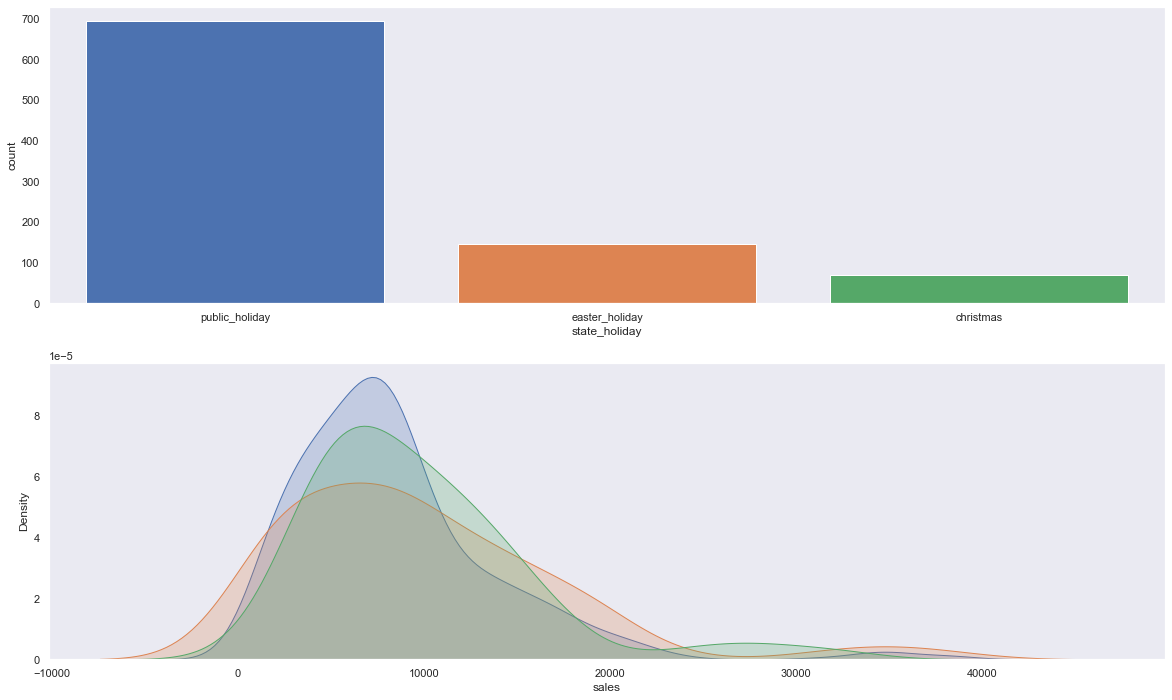

In [26]:
# Filter all categorical attributes
cat_attributes = df4.select_dtypes(include='object')

# first plot - count plot of state holidays
plt.subplot(2, 1, 1)
aux2 = cat_attributes[cat_attributes['state_holiday'] != 'regular_day']
sns.countplot(data=aux2, x='state_holiday', saturation=1)

# second plot, distribution of each state holiday category
plt.subplot(2, 1, 2)
sns.kdeplot(df4[cat_attributes['state_holiday'] == 'public_holiday']['sales'], shade=True)
sns.kdeplot(df4[cat_attributes['state_holiday'] == 'easter_holiday']['sales'], shade=True)
sns.kdeplot(df4[cat_attributes['state_holiday'] == 'christmas']['sales'], shade=True);

## 4.2 Bivariate - Hypothesis Validation

#### **H1.** Stores with a larger assortment should sell more.

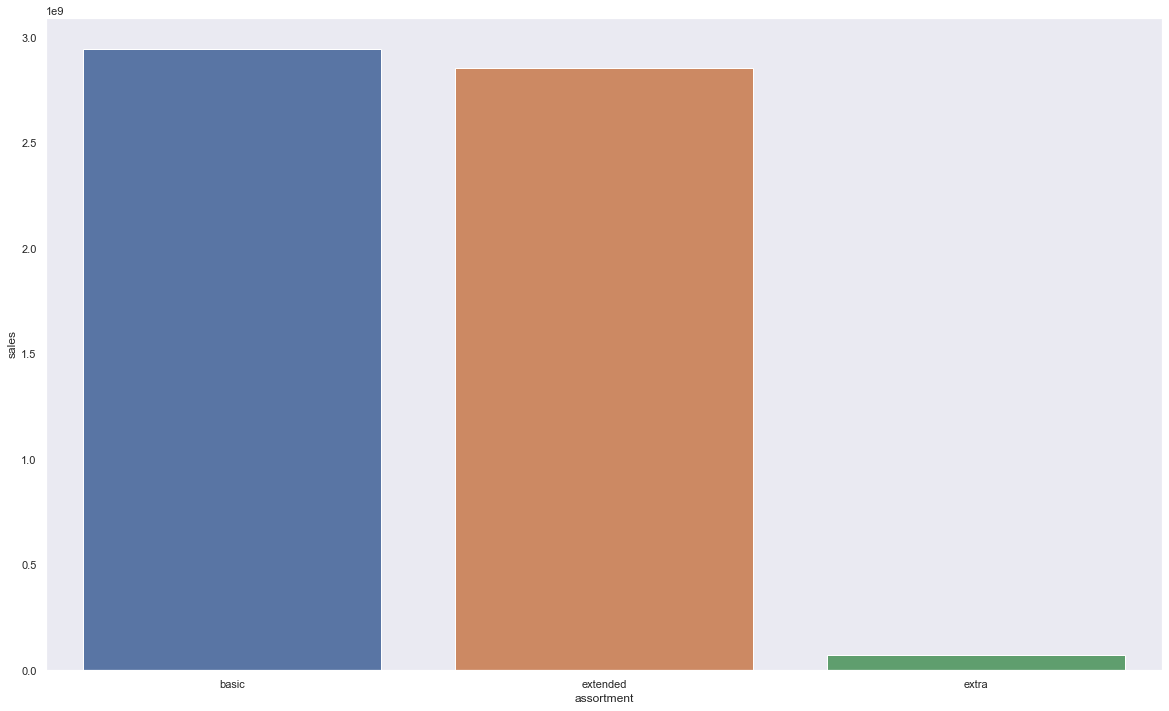

In [27]:
# barplot of sales volume per assortment type
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(data=aux1, x='assortment', y='sales');

#### **H2.** Do the behave of assortment on sales changed overtime?

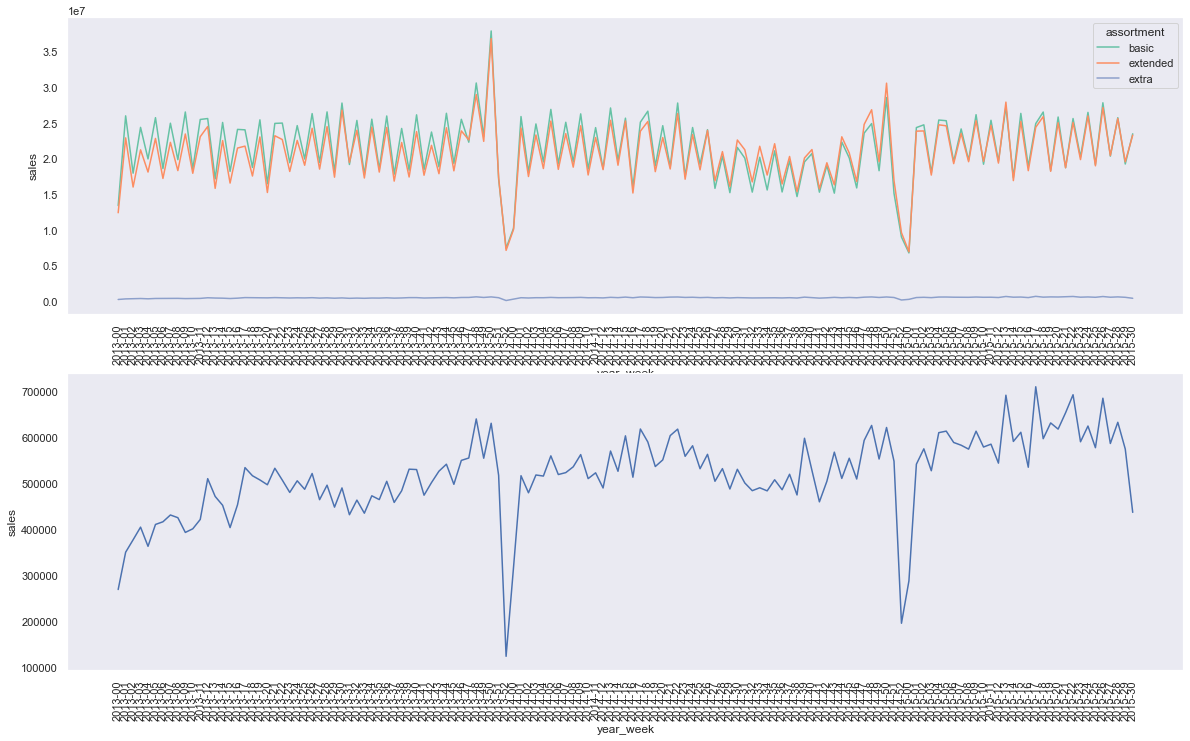

In [32]:
plt.figure(figsize=(20, 12))

# sales volumes per assortment type over the weeks
plt.subplot(2, 1, 1)
aux2 = df4[['assortment', 'sales', 'year_week']].groupby(['year_week', 'assortment']).sum().reset_index()
ax1 = sns.lineplot(data=aux2, x='year_week', y='sales', hue='assortment', palette='Set2')
plt.xticks(rotation=90)

# sales volumes of extra assortment type
plt.subplot(2, 1, 2)
aux3 = aux2[aux2['assortment'] == 'extra']
ax2 = sns.lineplot(data=aux3, x='year_week', y='sales', palette='Set2')
plt.xticks(rotation=90);

#### H3. Stores with closer competitors should sell less.

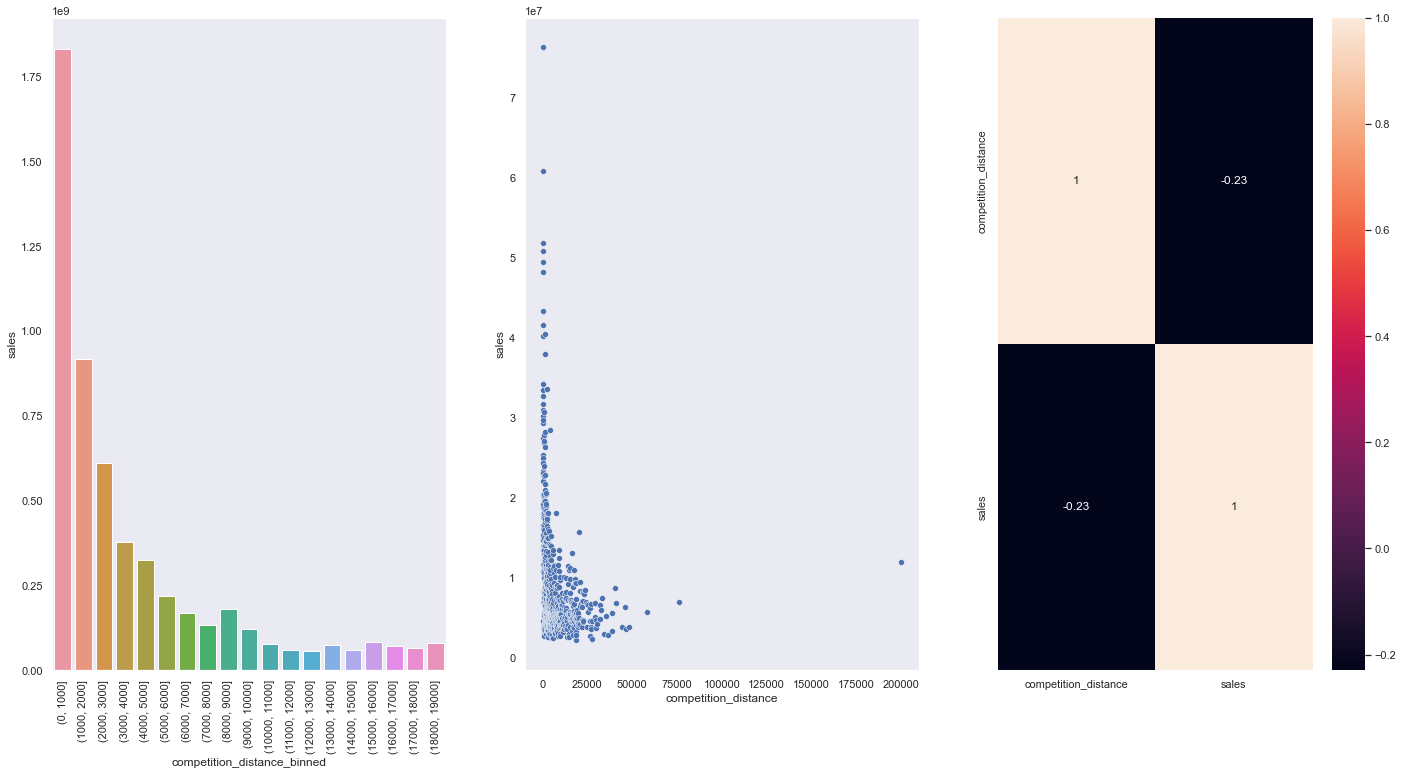

In [34]:
plt.figure(figsize=(24, 12))

plt.subplot(1, 3, 1)
bins = list(np.arange(0, 20000, 1000))
aux1 = df4[['sales', 'competition_distance']].groupby('competition_distance').sum().reset_index()
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['sales', 'competition_distance_binned']].groupby('competition_distance_binned').sum().reset_index()
plt.xticks(rotation=90)                                          
sns.barplot(x='competition_distance_binned', y='sales', data=aux2)

plt.subplot(1, 3, 2)
sns.scatterplot(x='competition_distance', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

#### H4. Stores with longer-term competitors should sell more.

<AxesSubplot:xlabel='competition_time_month', ylabel='sales'>

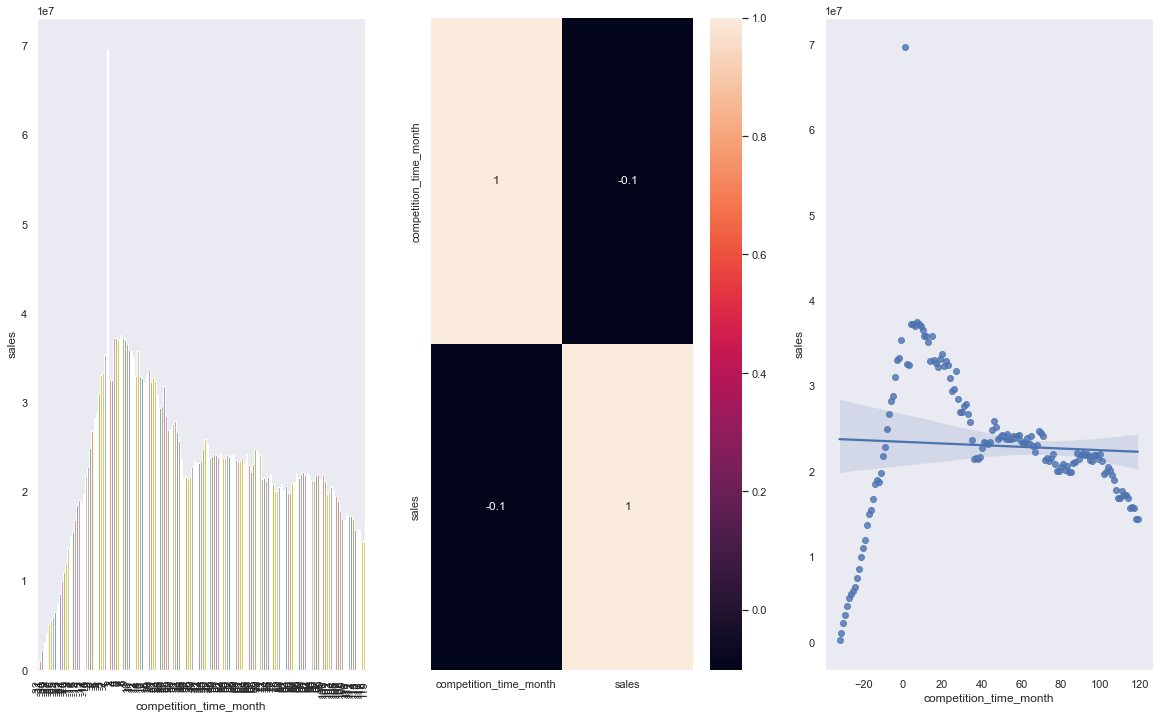

In [51]:
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]

plt.subplot(1, 3, 1)
sns.barplot(x='competition_time_month', y='sales', data=aux2, palette='Set2')
plt.xticks(rotation=90)


plt.subplot(1, 3, 2)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

plt.subplot(1, 3, 3)
sns.regplot(x='competition_time_month', y='sales', data=aux2);

#### H5. Stores with longer promotions should sell more.

#### H6. Stores with more promotion days should sell more.


#### H7. Stores with more consecutive promotions should sell more.


#### H8. stores open during the Christmas holiday should sell more.


#### H9. Stores should sell more over the years.

#### H10. Stores should sell more in the second half of the year.

#### H11. Stores should sell more after the 10th month of the year


#### H12. Stores should sell less on weekends.


#### H13. Stores should sell less on weekends.

#### H14. Stores should sell less during school holidays.

## 4.3 Multivariate